#### Autori:Giuseppe Santucci, Antonella Poggi e Marco Schaerf

[Dipartimento di Ingegneria informatica, automatica e gestionale](https://www.diag.uniroma1.it)

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.eu.png"
     alt="License"
     style="float: left;"
     height="40" width="100" />
This notebook is distributed with license Creative Commons *CC BY-NC-SA*

# Test e debug
1. Un esempio
2. Obbiettivo dell'attività di test
2. Ripetibilità dei test
3. Strategie per la definizione dei casi di test
4. Tecniche di debug
    - 5.1 Semplici print
    - 5.2 Ispezioni delle variabili in Spyder
    - 5.3 Uso di Python tutor

## Casi di test per il programma triangolo

 ## Un esempio
Una funzione Python riceve in ingresso tre interi, corrispondenti ai lati di un triangolo e restituisce
una stringa corrispondente al tipo di triangolo:
* scaleno  
* isoscele
* equilatero

 
 ### Con quali test lo provereste?
 Scrivete su un foglio i casi di test che usereste per testare il programma...


In [1]:
from triangolo import *

if __name__ == '__main__':
    from tester import tester_fun    


    """SE NON VOLETE ESEGUIRE UN TEST COMMENTATE LA RIGA RELATIVA CON #"""

    counter_test_positivi = 0
    total_tests = 5

    counter_test_positivi += tester_fun(triangolo, [3,4,5] , 'scaleno')
    

    print('La funzione',triangolo.__name__,'ha superato',counter_test_positivi,'test su',total_tests)


Test funzione: triangolo 

Input funzione: 3, 4, 5 

Output atteso:
'scaleno'

----- print interne funzione -----

----------------------------------

Output ottenuto:
'scaleno'

Risultato Test: POSITIVO

******************************

La funzione triangolo ha superato 1 test su 5


## Avete pensato anche a: 
* un test con un triangolo scaleno valido (2,5,10 non va bene)
* un test con un trangolo equilatero valido
* un test con un triangolo isoscele valido (2,2,4 non va bene)
* un test con le tre permutazioni dei lati di un triangolo isoscele  	(3,3,4 / 3,4,3 / 4,3,3)
### input errati o che cercano casi particolari di errore?
* un lato di lunghezza pari a 0
* un lato di lunghezza negativa
* tre interi di cui uno è uguale alla somma degli altri due (1,2,3) con permutazioni (1,2,3 / 1,3,2 / 3,1,2)
* tre interi di cui uno è minore della somma degli altri due (1,2,4) con permutazioni (1,2,4 / 1,4,2 / 4,1,2)
* tre zeri (0,0,0)
* un lato reale  (3.0, 4, 5)
* solo due interi (3,4)

## Anche testare un programma banale NON è banale


## E chatGPT ?
Scrivere una funzione che riceve in ingresso un vettore di interi v e due interi i1 e i2 e calcola la lunghezza della più lunga sequenza di interi consecutivi di v che contiene lo stesso numero (maggiore di zero) di i1 e i2. Ad esempio, se v vale [9,5,7,33,9,5,5,5,8,5,33,33,6,15,8,5,6] e i1 = 33 e i2 =5, la funzione deve restituire 9 perché esiste una sequenza di lunghezza 9 avente la caratteristica richiesta e non c’è in v una sequenza di questo tipo che abbia lunghezza superiore.

##### ChatGPT dice:
Ecco un esempio di funzione in Python che calcola la lunghezza della più lunga sequenza di interi consecutivi in un vettore che contiene lo stesso numero di i1 e i2. Eseguendo la funzione con:
* v=[9,5,7,33,9,5,5,5,8,5,33,33,6,15,8,5,6]
* i1 = 33 
* i2 =5
il risultato sarà 9
Come prima cosa lo testiamo con il caso di test proposto...


In [2]:
def Ex1(v,i1,i2):  #soluzione ChatGPT
    max_len = 0
    curr_len = 0
    count_i1 = 0
    count_i2 = 0

    for num in v:
        if num == i1:
            count_i1 += 1
        elif num == i2:
            count_i2 += 1

        if count_i1 > 0 and count_i2 > 0 and num != i1 and num != i2:
            curr_len += 1
        else:
            curr_len = 0
            count_i1 = 0
            count_i2 = 0

        max_len = max(max_len, curr_len)

    return max_len

def Ex1e(v,i1,i2):  #soluzione compito di esame: cambiare il nome in Ex1 per testarla
    maxlen = 0
    for i in range(len(v)):
        for j in range(i+1,len(v)):
            subv=v[i:j+1]
            if len(subv) > maxlen and subv.count(i1) == subv.count(i2) and i1 in subv:
                maxlen = j+1-i
    return maxlen


###############################################################################

"""NON MODIFICARE IL CODICE (codice di test della funzione)"""

if __name__ == '__main__':
    from tester import tester_fun



   
  
    tester_fun(Ex1, [[9,5,7,33,9,5,5,5,8,5,33,33,6,15,8,5,6],33,5],9)




Test funzione: Ex1 

Input funzione: [9, 5, 7, 33, 9, 5, 5, 5, 8, 5, 33, 33, 6, 15, 8, 5, 6], 33, 5 

Output atteso:
9

----- print interne funzione -----

----------------------------------

Output ottenuto:
0

Risultato Test: NEGATIVO

******************************



## Obbiettivo dell'attività di test:
# Trovare errori!
Un insieme di casi di test test che non trova un errore ha fallito!
Torniamo al triangolo (questa volta la funzione triangolo 1 è più robusta e passa tutti i test mostrati nel seguito)
Abbiamo fallito...

In [3]:
from triangolo1 import *

if __name__ == '__main__':
    from tester import tester_fun    


    """SE NON VOLETE ESEGUIRE UN TEST COMMENTATE LA RIGA RELATIVA CON #"""

    counter_test_positivi = 0
    total_tests = 6

    counter_test_positivi += tester_fun(triangolo, [3,4,5] , 'scaleno')
    counter_test_positivi += tester_fun(triangolo, [3,3,5] , 'isoscele')
    counter_test_positivi += tester_fun(triangolo, [5,3,3] , 'isoscele')
    counter_test_positivi += tester_fun(triangolo, [3,3,3] , 'equilatero')    
    counter_test_positivi += tester_fun(triangolo, [-3,4,5] , 'errore')
    counter_test_positivi += tester_fun(triangolo, [4,1,2] , 'errore')
    
    

    print('La funzione',triangolo.__name__,'ha superato',counter_test_positivi,'test su',total_tests)


Test funzione: triangolo 

Input funzione: 3, 4, 5 

Output atteso:
'scaleno'

----- print interne funzione -----

----------------------------------

Output ottenuto:
'scaleno'

Risultato Test: POSITIVO

******************************

Test funzione: triangolo 

Input funzione: 3, 3, 5 

Output atteso:
'isoscele'

----- print interne funzione -----

----------------------------------

Output ottenuto:
'isoscele'

Risultato Test: POSITIVO

******************************

Test funzione: triangolo 

Input funzione: 5, 3, 3 

Output atteso:
'isoscele'

----- print interne funzione -----

----------------------------------

Output ottenuto:
'isoscele'

Risultato Test: POSITIVO

******************************

Test funzione: triangolo 

Input funzione: 3, 3, 3 

Output atteso:
'equilatero'

----- print interne funzione -----

----------------------------------

Output ottenuto:
'equilatero'

Risultato Test: POSITIVO

******************************

Test funzione: triangolo 

Input funzione:

# I test devono essere 
## cattivi! 
Cercare l'errore sui casi limite (vettore vuoto, elemento cercato in prima o ultima posizione, ciclo in più, ciclo in meno, confronti quasi esatti, e.g., <= invece di < , ...)

Il test (4,2,1) scopre un triangolo degenere: 2+1<4 ma il caso limite è a+ b <= 4...
proviamo 4,2,2...

e troviamo l'errore nel codice x+y<z vs x+y<=z...

```Python
def triangolo(a, b, c):
    if a <= 0 or b <= 0 or c <= 0 or (a + b < c) or (a + c < b) or (b + c <a):
        return "errore"
    elif a == b == c:
        return "equilatero"
    elif a == b or a == c or b == c:
        return "isoscele"
    else:
        return "scaleno"
```



## non ridondanti:

se 3,3,3 restituisce 'equilatero', possiamo assumere che qualunque terna n,n,n con n>0 restituisca equilatero... Classe di equivalenza: un insieme di casi di test che possono essere (ragionevolmente) rappresentati da un unico test.

## ripetibili:

Fare test inserendo i valori a mano non va bene... Ovvero funziona solo per piccoli programmi
Se faccio 10 test a mano con esito positivo, e l'undicesimo trova un errore che correggo, chi mi garantisce che i precedenti 10 test funzionino ancora? E come faccio a ricordarli e rieseguirli?
La funzione tester_fun vi fornisce un rudimentale ma efficiente mezzo per ripetere automaticamente quante volte volete un insieme di test a valle di una modifica del codice. Esistono meccanismi  molto più efficaci tipo **junit** o strumenti commerciali, ma l'idea è sempre la stessa:
## evitare test usa e getta...



#### Debug
Una volta trovato un errore si entra nalla fase di correzione, detta debug.
Una tecnica di base è quella di osservare l'esecuzione del programma e ispezionare il valore delle variabili. Facciamo riferimento al seguente programma in cui il quarto caso di test evidenzia un errore:


In [4]:
def sommaPrimiNmultipli(a,n): #calcola e restituisce la somma dei primi n multipli di a
    if a==0 or n== 0:
        return 0
    somma=0
    for i in range(n):
        somma+=i*a
    return somma

if __name__ == '__main__':
    from tester import tester_fun    

    counter_test_positivi = 0
    total_tests = 4

    counter_test_positivi += tester_fun(sommaPrimiNmultipli, [0,0] , 0)
    counter_test_positivi += tester_fun(sommaPrimiNmultipli, [0,1] , 0)
    counter_test_positivi += tester_fun(sommaPrimiNmultipli, [5,0] , 0)
    counter_test_positivi += tester_fun(sommaPrimiNmultipli, [3,9] , 135)    

    print('La funzione',sommaPrimiNmultipli.__name__,'ha superato',counter_test_positivi,'test su',total_tests)


Test funzione: sommaPrimiNmultipli 

Input funzione: 0, 0 

Output atteso:
0

----- print interne funzione -----

----------------------------------

Output ottenuto:
0

Risultato Test: POSITIVO

******************************

Test funzione: sommaPrimiNmultipli 

Input funzione: 0, 1 

Output atteso:
0

----- print interne funzione -----

----------------------------------

Output ottenuto:
0

Risultato Test: POSITIVO

******************************

Test funzione: sommaPrimiNmultipli 

Input funzione: 5, 0 

Output atteso:
0

----- print interne funzione -----

----------------------------------

Output ottenuto:
0

Risultato Test: POSITIVO

******************************

Test funzione: sommaPrimiNmultipli 

Input funzione: 3, 9 

Output atteso:
135

----- print interne funzione -----

----------------------------------

Output ottenuto:
108

Risultato Test: NEGATIVO

******************************

La funzione sommaPrimiNmultipli ha superato 3 test su 4


#### Debug
Il modo più semplice per osservare l'esecuzione di un programma è quello di inserire delle istruzioni di stampa per controllare l'esecuzione dei cicli e ispezionare il contenuto delle variabili. Modifichiamo la funzione nel seguente modo:

In [ ]:
def sommaPrimiNmultipli(a,n): #calcola e restituisce la somma dei primi n multipli di a
    if a==0 or n== 0:
        return 0
    somma=0
    for i in range(n):
        somma+=i*a
        print(i,somma,i*a) #stampa i, il valore della somma, e il multiplo di a
    return somma

s=sommaPrimiNmultipli(3,9)
print(s)


Osservando le stampe è facile accorgersi che nella prima iterazione sommiamo 0 e non 3 e che quindi nell'ultima sommiamo 8*3 e non 9*3. Il ciclo effettua correttamente 9 cicli ma parte da 0 e arriva a otto. Modificando i parametri del range in range(1,n+1) facciamo assumere alla variabile i i valori corretti e le stampe confermano la correttezza del ciclo.

In [ ]:
def sommaPrimiNmultipli(a,n): #calcola e restituisce la somma dei primi n multipli di a
    if a==0 or n== 0:
        return 0
    somma=0
    for i in range(1,n+1):
        somma+=i*a
        print(i,somma,i*a) #stampa i, il valore della somma, e il multiplo di a
    return somma

s=sommaPrimiNmultipli(3,9)
print(s)


La stessa cosa può essere fatta su Python Tutor osservando i risultati della prima iterazione del for
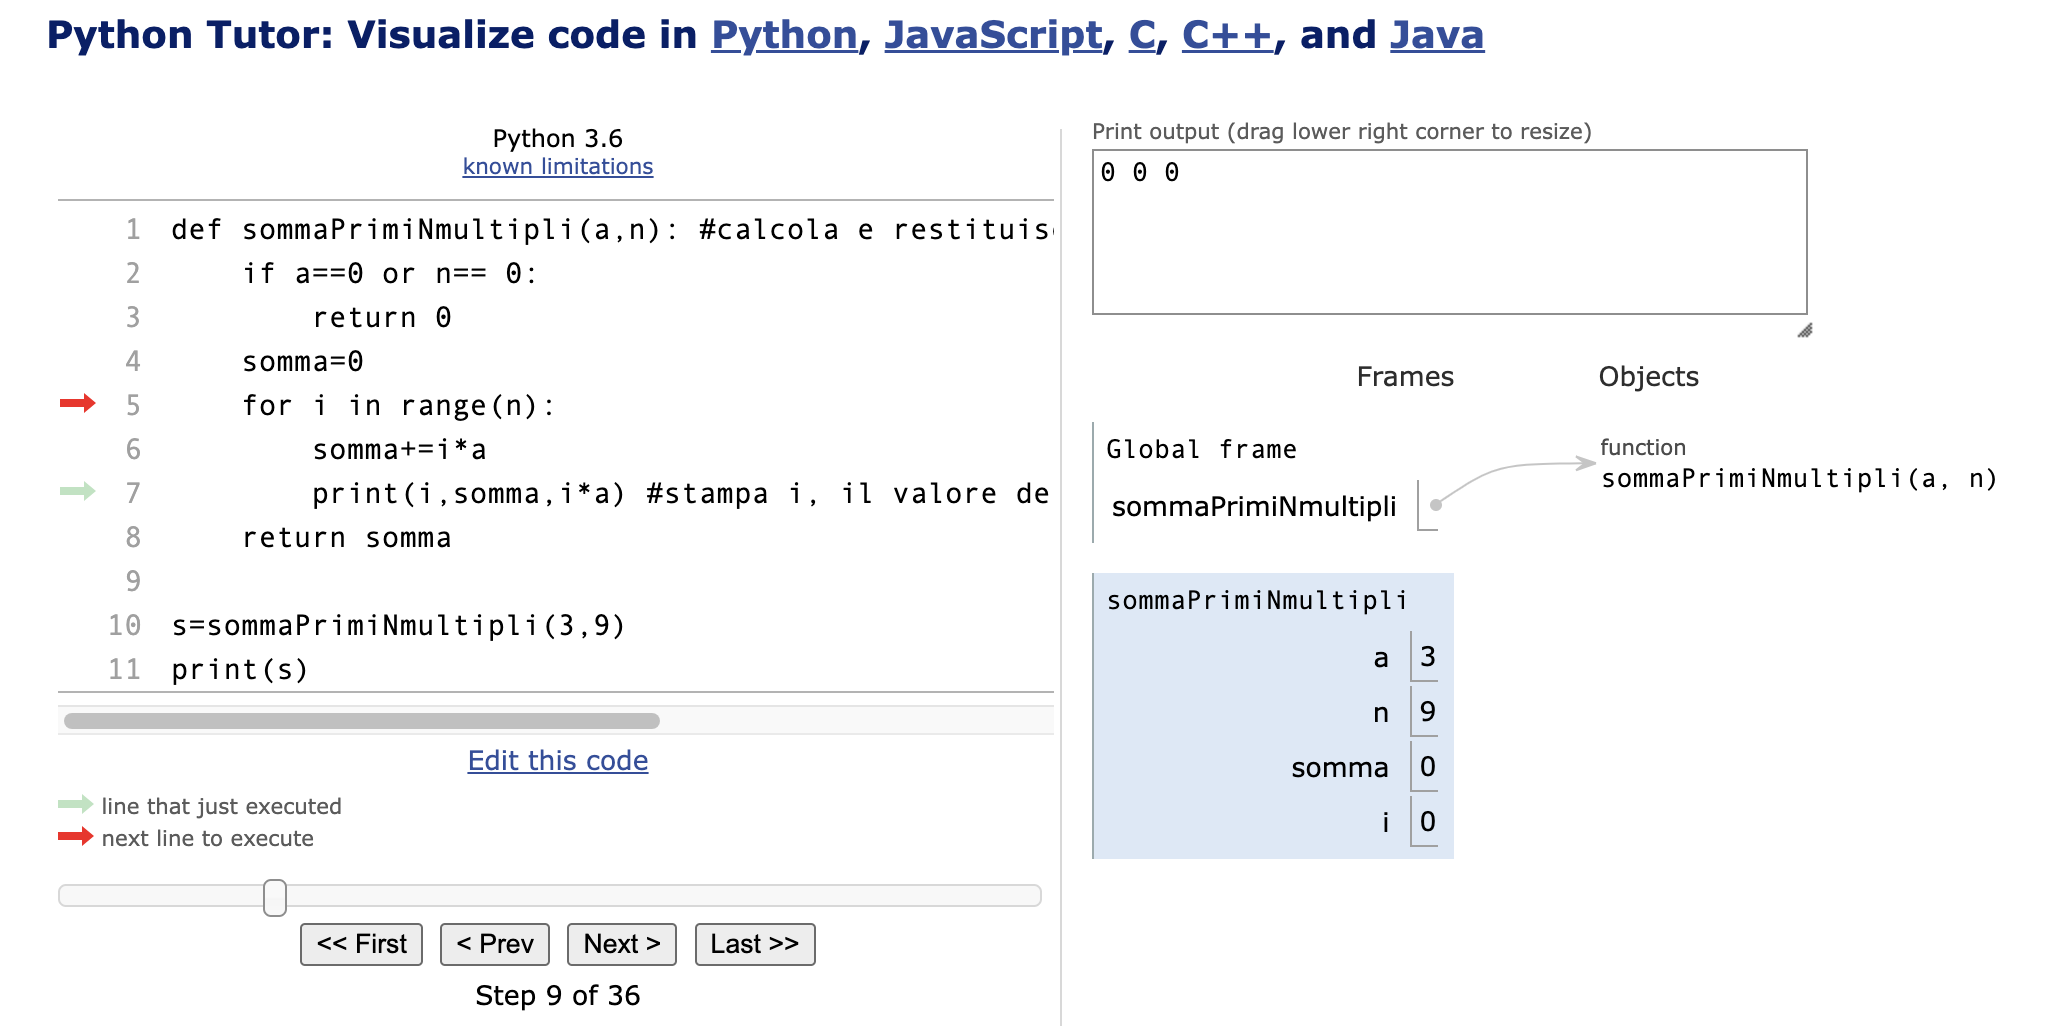

Un modo artigianale di visualizzare le variabili locali ed eseguire un programma una istruzione alla volta è quello di inserire una print() ogni volta che vogliamo osservare una variabile e una istruzione di input() che blocca il programma nel punto desiderato (tipicamente nei cicli) e permette di ispezionare le variabili locali:

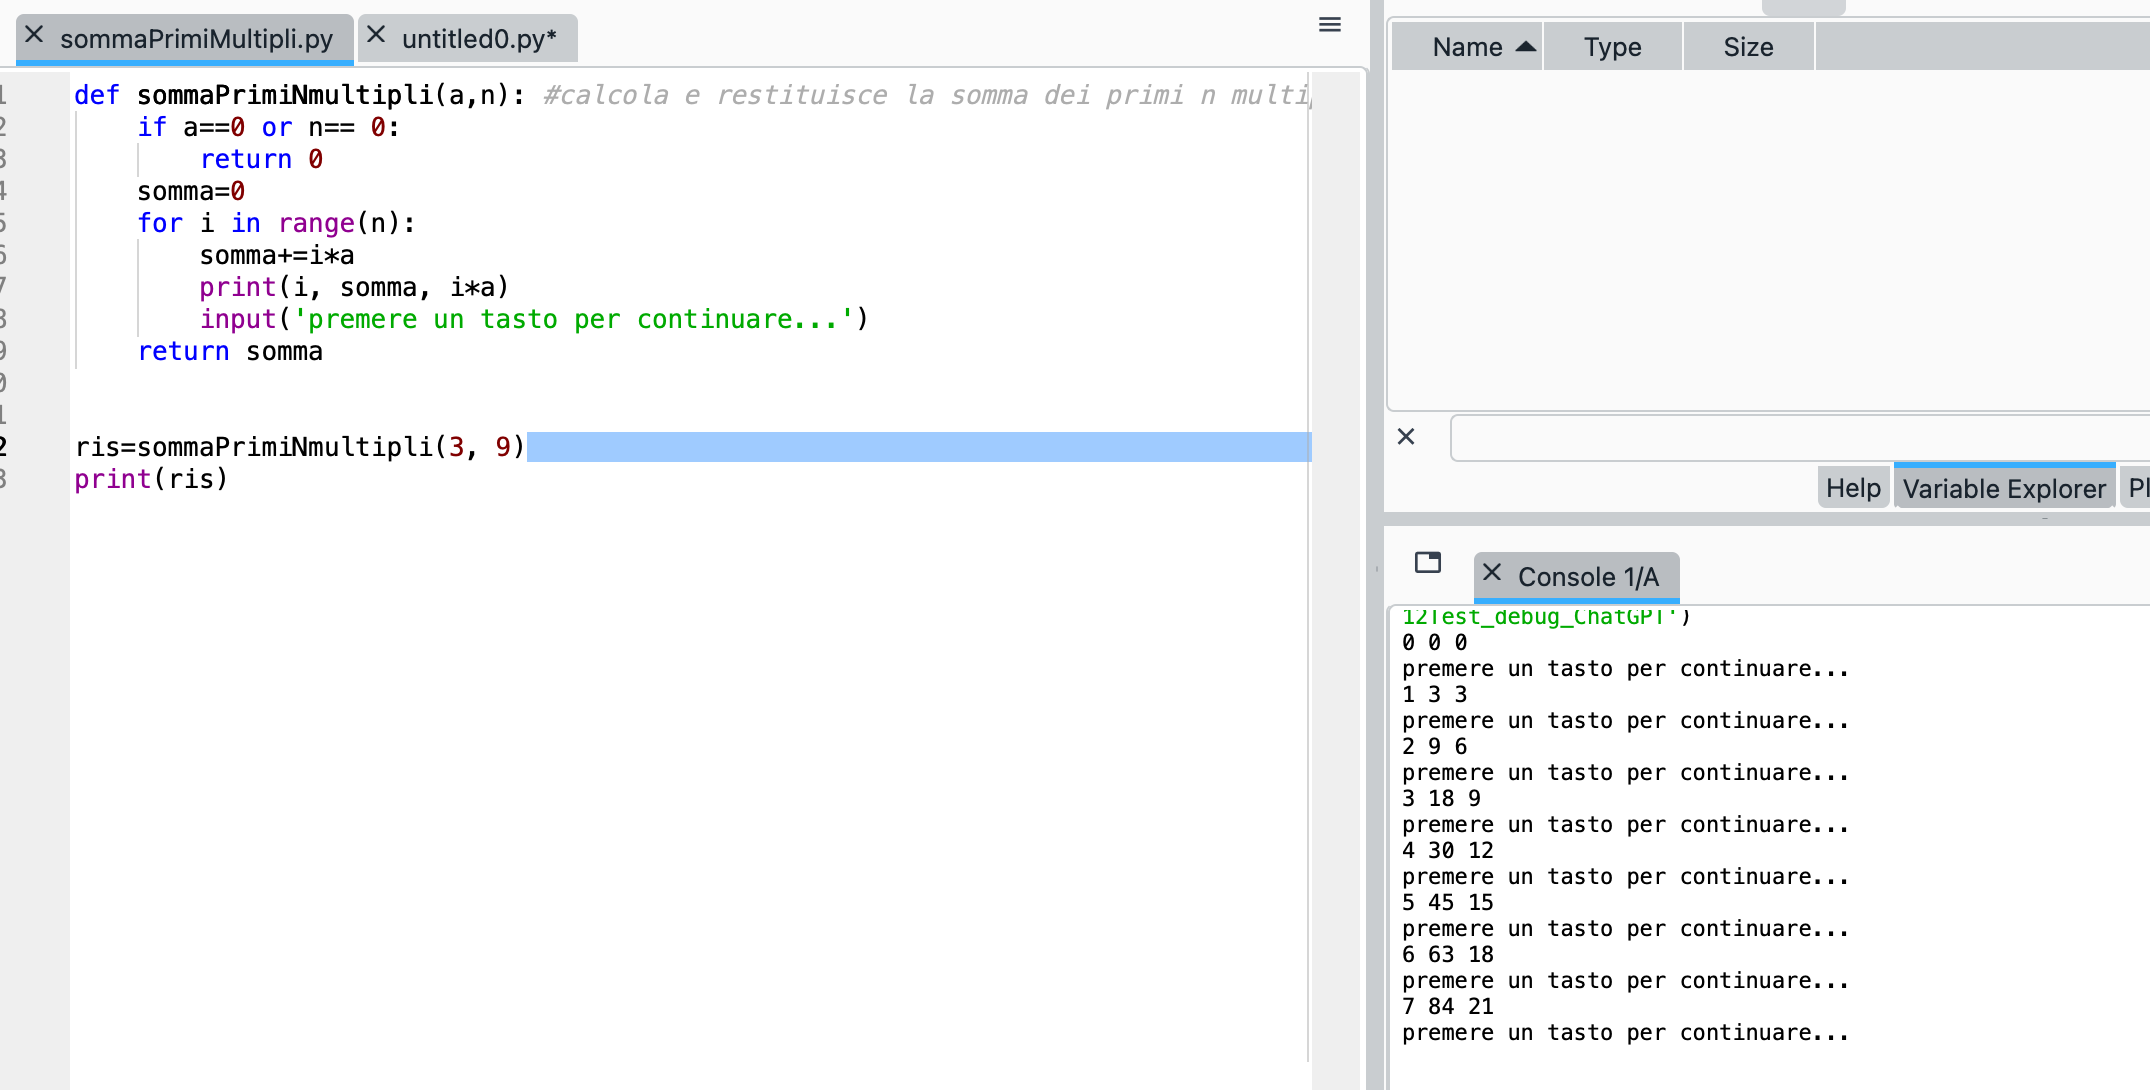

Il modo standard e più potente è quello di utilizzare gli strumenti messi a disposizione da Spyder:
* la finestra Variable explorer e il menu Debug

Durante la normale esecuzione di un programma la finestra **Variable explorer** mostra **solo** contenuto delle **variabili globali** alla fine dell'esecuzione del programma:

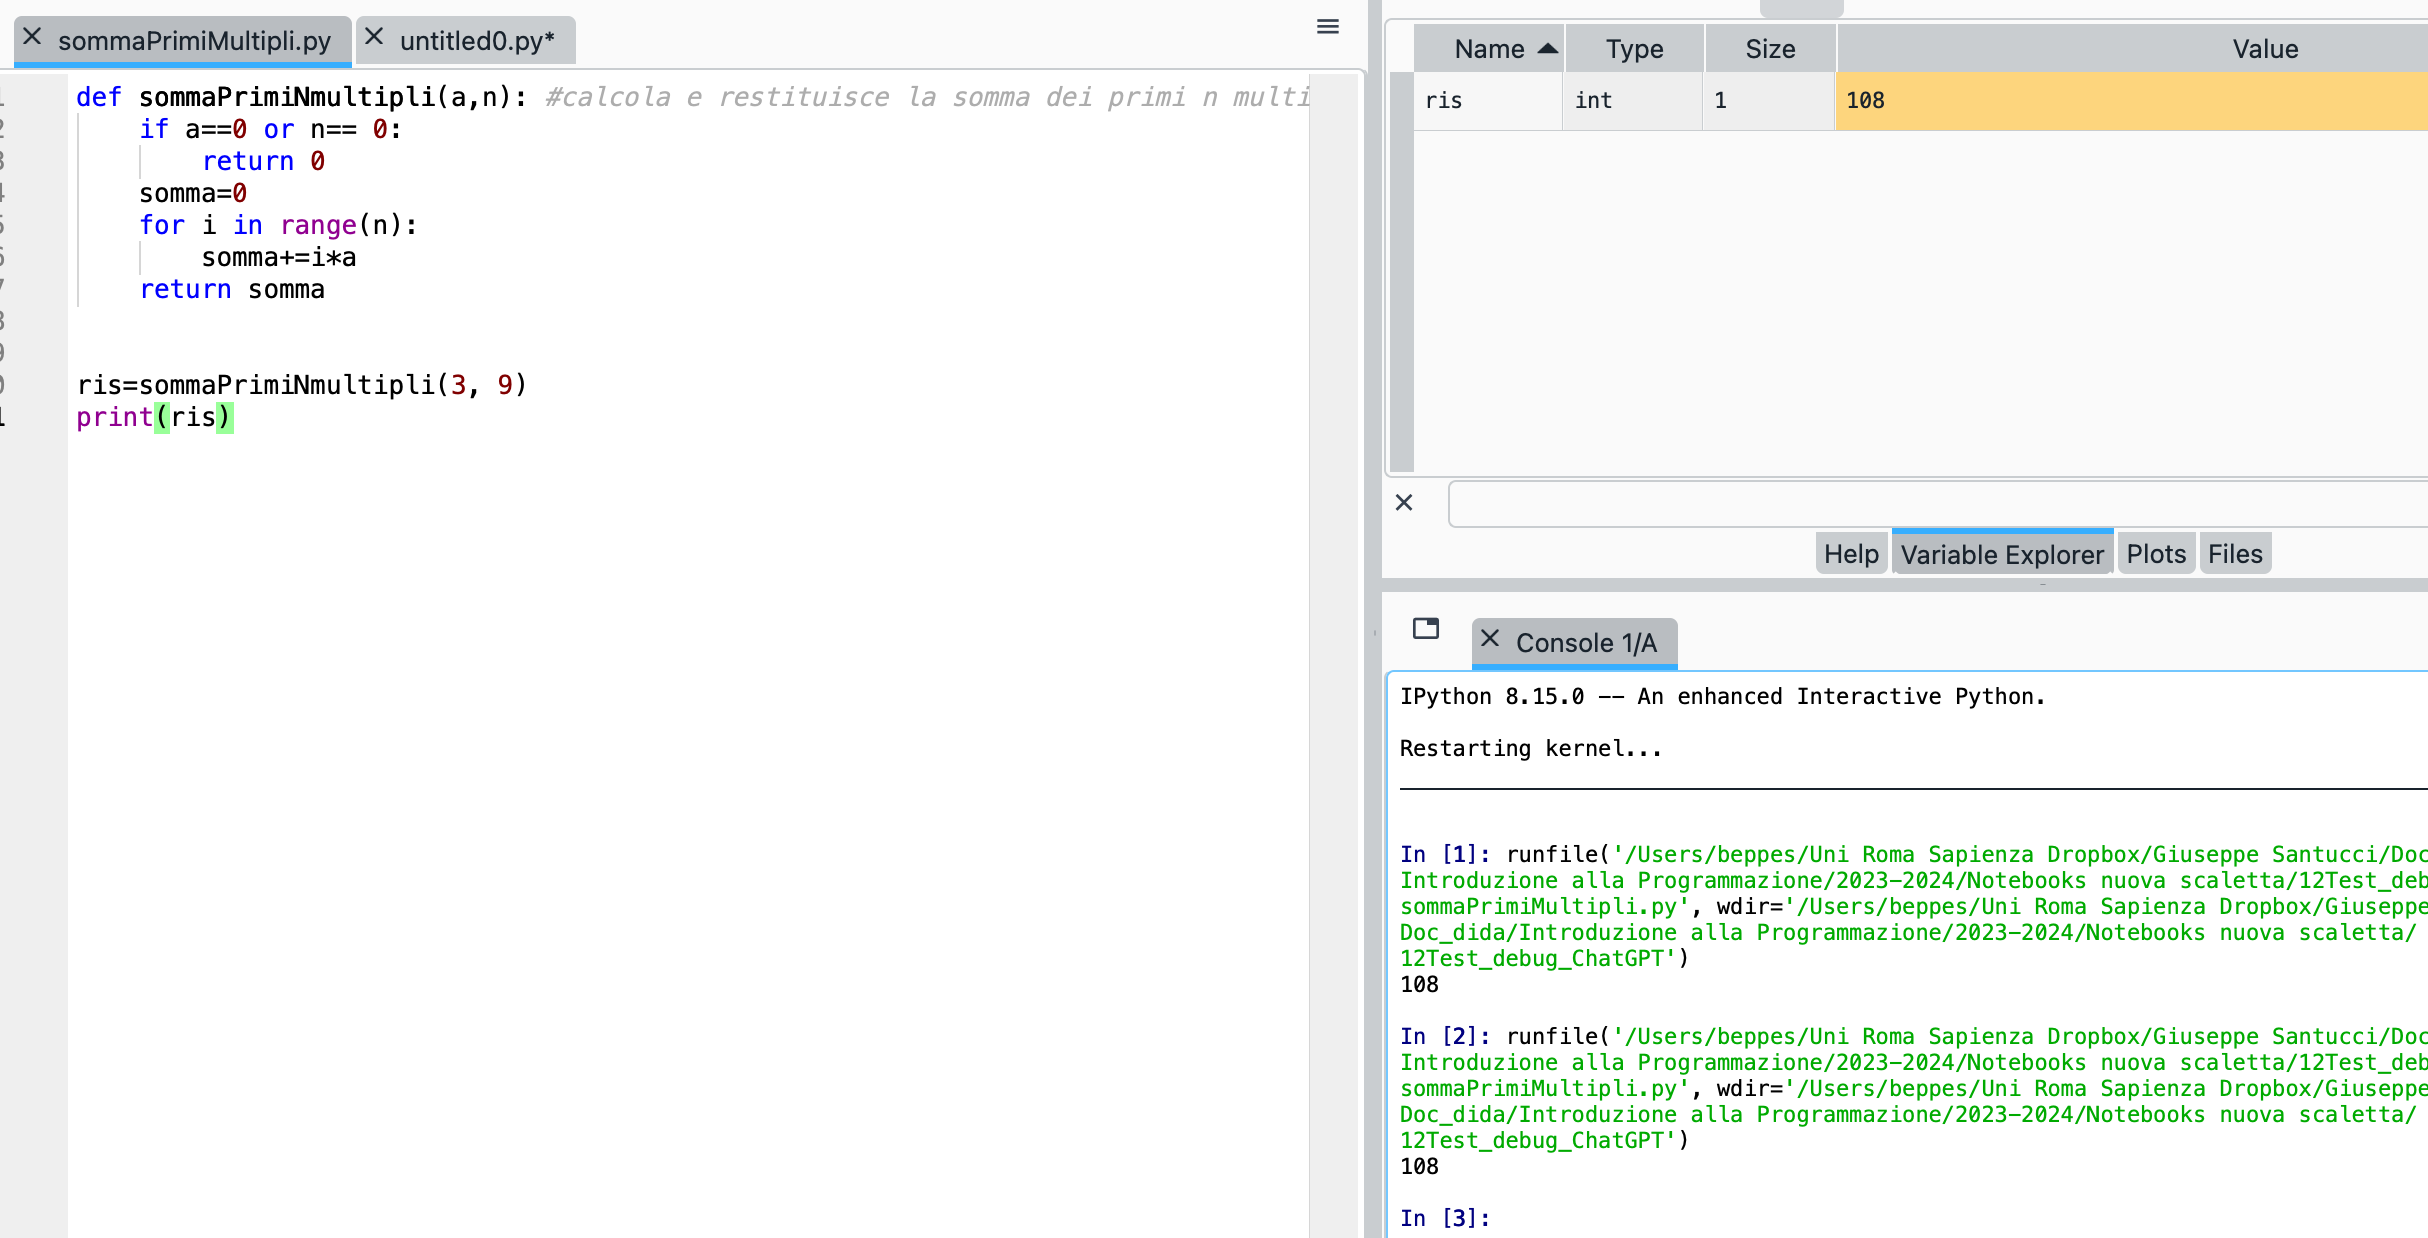

Si consiglia di configurare (ultima icona a destra) la finestra Variable explorer nel seguente modo:

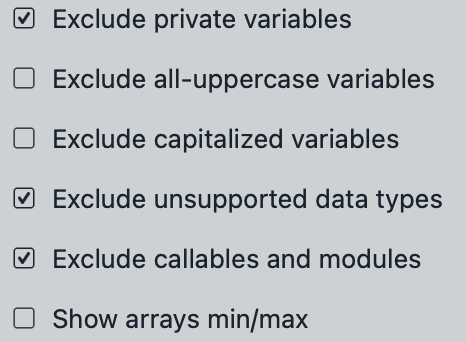

Per eseguire il programma una istruzione alla volta è necessario attivare la funzionalità di debug dall'apposito menu di Spyder (command-F5):


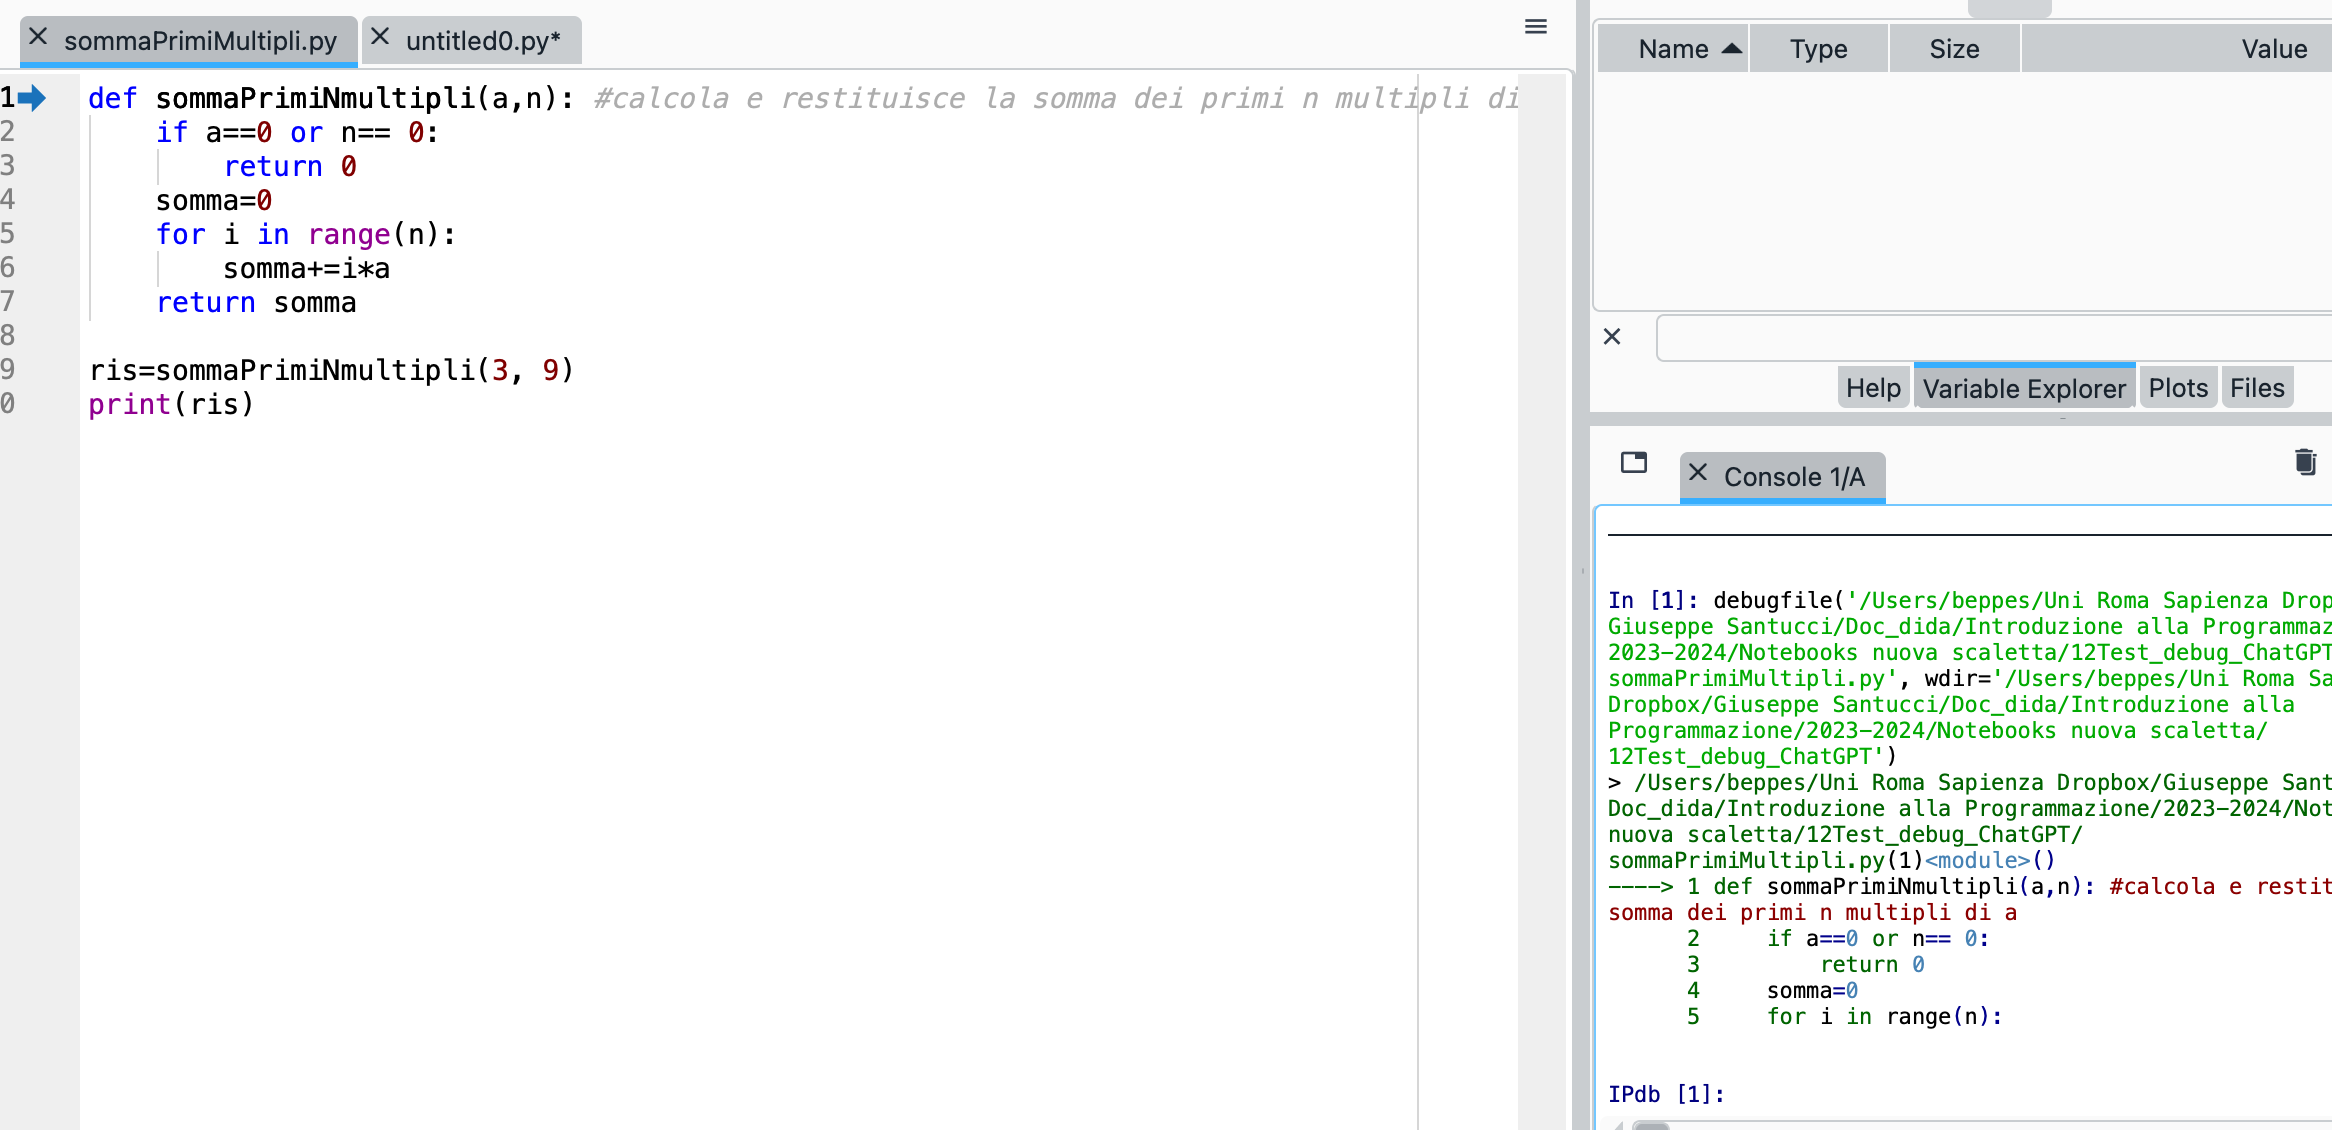

La freccia nell'editor indica l'istruzione che deve essere eseguita e nella console compare il prompt del debug **IPdb [1]** che accetta i seguenti comandi:

* !next  (oppure command-F10) che esegue l'istruzione e passa al prossimo

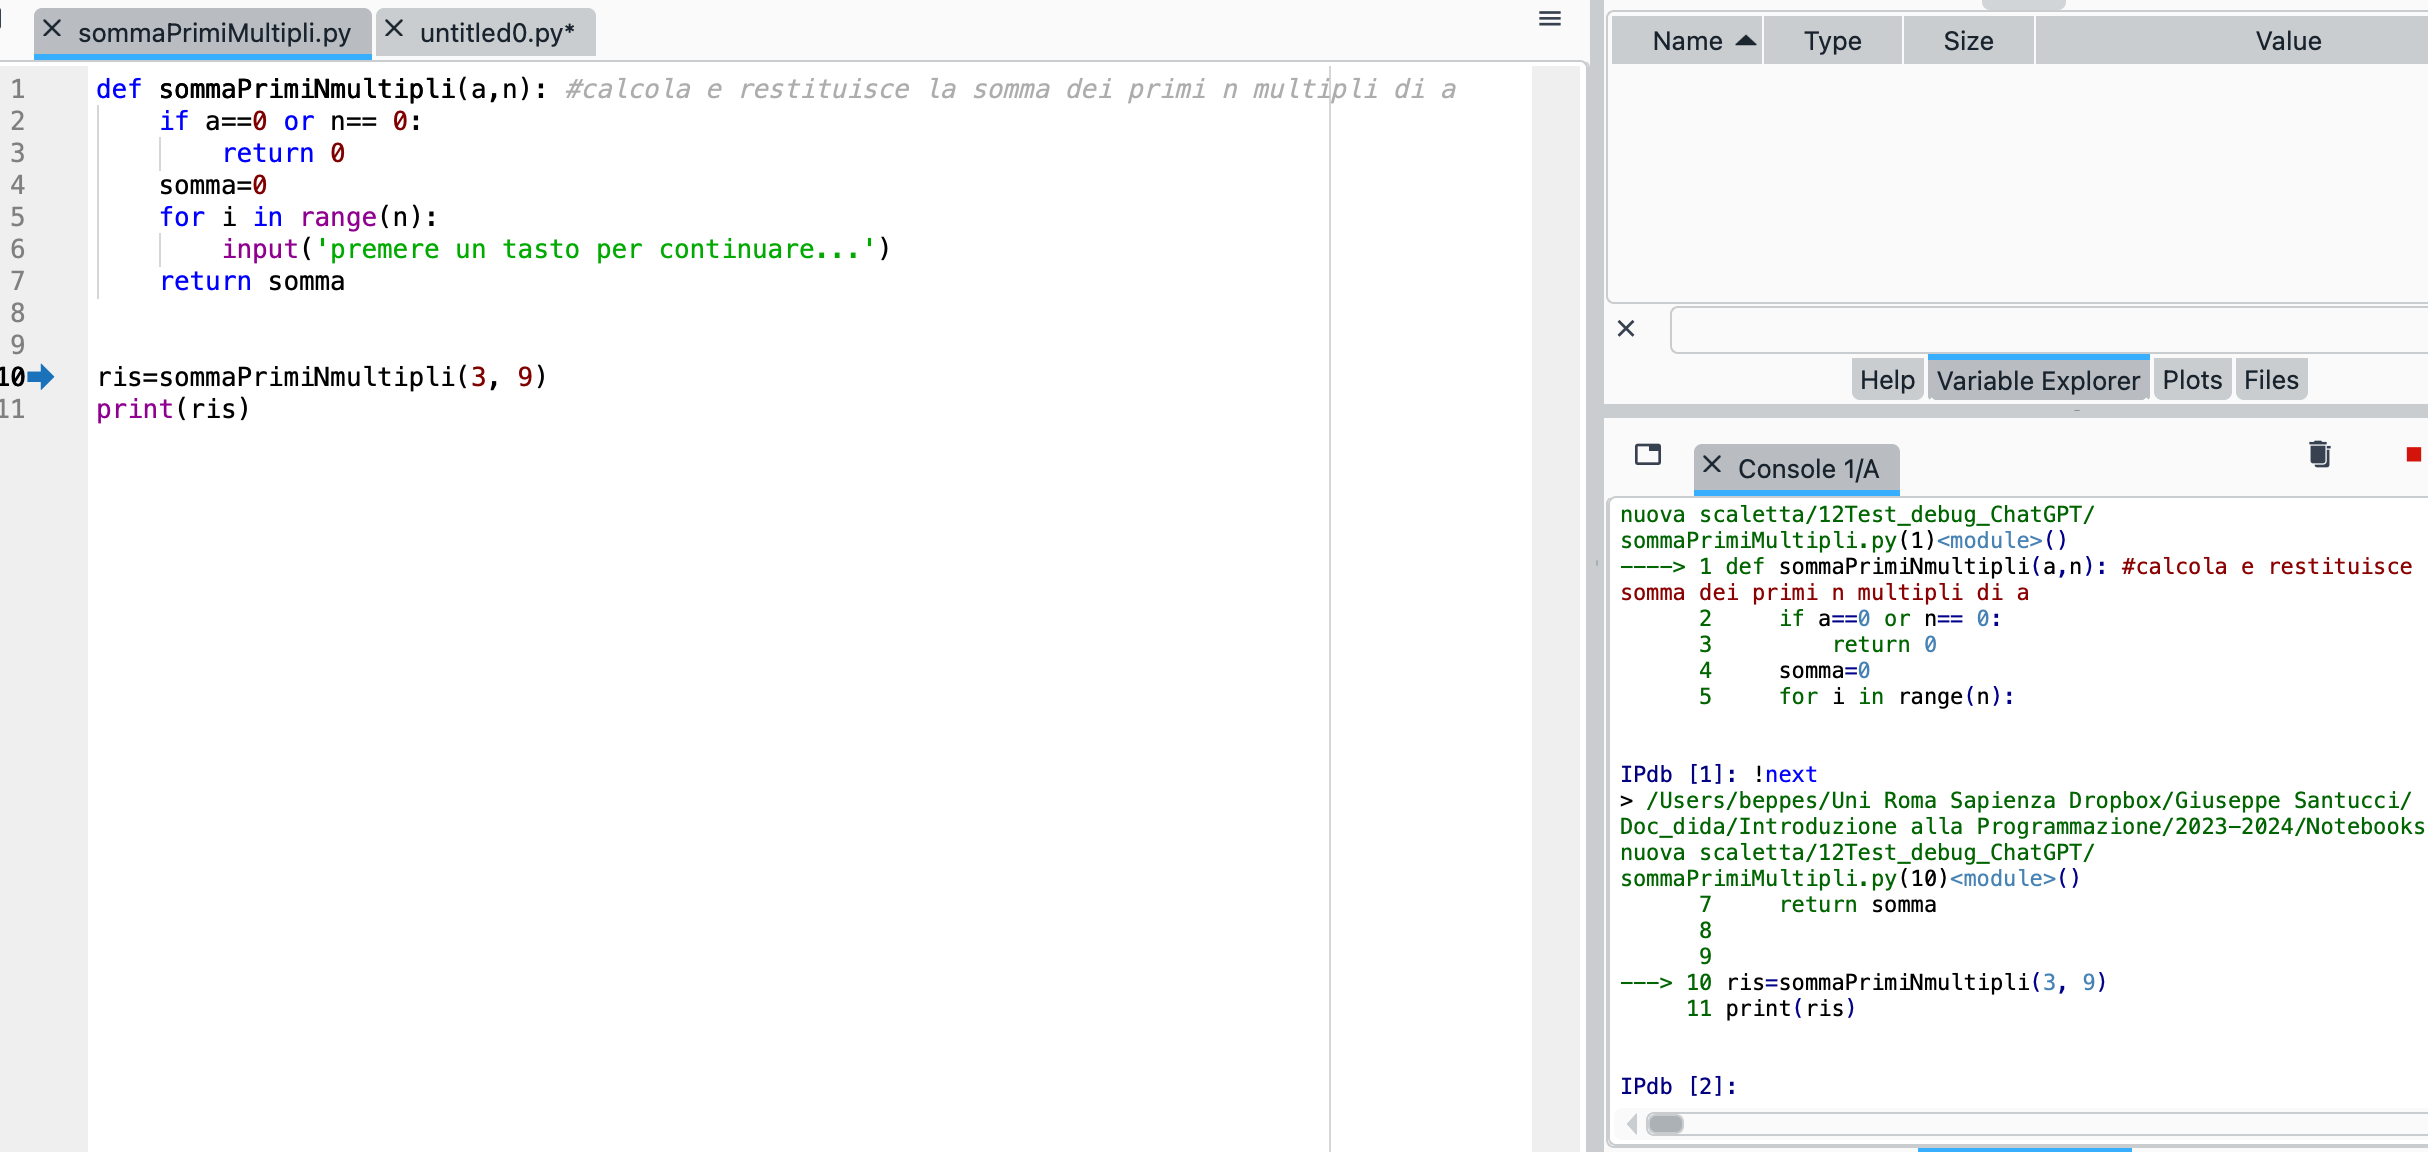

Si noti che se la prossima istruzione da eseguire è una funzione !next esegue **tutta** la funzione e non mostra le variabili locali. Invece, il comando da menu step Into (command F11) entra nella funzione e mostra tutte le variabili locali: 

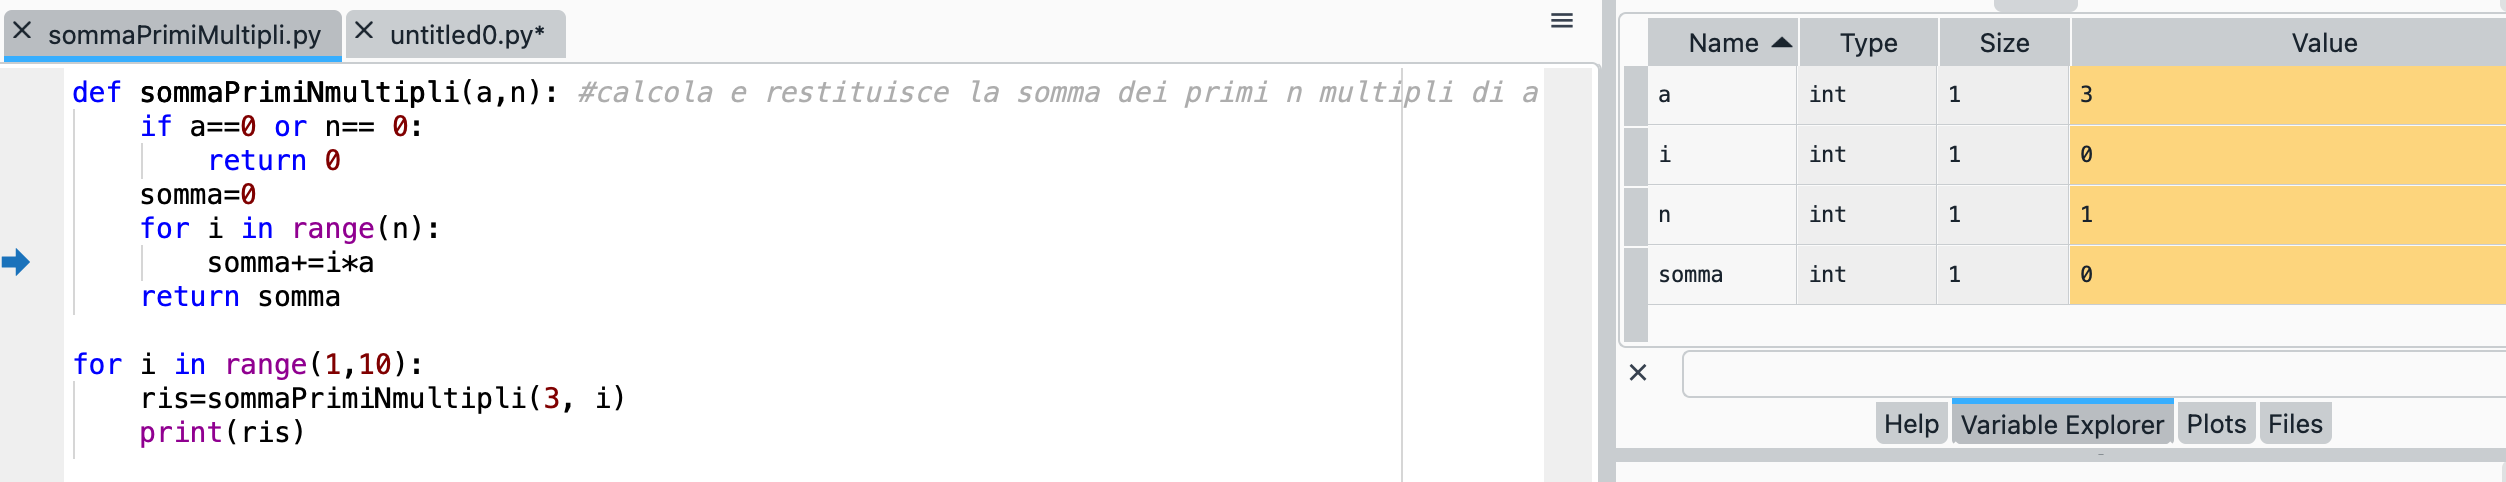


## Riassumendo:

Ci sono varie alternative per eseguire un programma una istruzione alla volta e ispezionare variabili locali e globali e la più potente e versatile è attivare il Debug di Spyder (o tasti command-F5) e poi, con (command-F11) eseguire una istruzione alla volta osservando tutte le variabili.

### Esercizio
Scrivere un funzione che prende in input una lista di numeri e restituisce la lunghezza della più lunga sequenza di numeri non decrescenti